In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
url = "letter-recognition.data"
data = pd.read_csv(url, header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [ ]:
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [ ]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([19,  8,  3, ..., 19, 18,  0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[4, 7, 5, ..., 8, 4, 8],
       [4, 7, 6, ..., 8, 4, 7],
       [3, 5, 4, ..., 9, 2, 6],
       ...,
       [3, 4, 6, ..., 7, 3, 9],
       [3, 8, 4, ..., 8, 1, 7],
       [1, 3, 2, ..., 7, 0, 7]])

In [ ]:
y_train

array([ 4,  4, 13, ..., 23,  8,  9])

In [ ]:
X_train.shape

(16000, 16)

In [ ]:
y_train.shape

(16000,)

In [ ]:
X_train = X_train / 15.0
X_test = X_test / 15.0

In [ ]:
X_train

array([[0.01777778, 0.03111111, 0.02222222, ..., 0.03555556, 0.01777778,
        0.03555556],
       [0.01777778, 0.03111111, 0.02666667, ..., 0.03555556, 0.01777778,
        0.03111111],
       [0.01333333, 0.02222222, 0.01777778, ..., 0.04      , 0.00888889,
        0.02666667],
       ...,
       [0.01333333, 0.01777778, 0.02666667, ..., 0.03111111, 0.01333333,
        0.04      ],
       [0.01333333, 0.03555556, 0.01777778, ..., 0.03555556, 0.00444444,
        0.03111111],
       [0.00444444, 0.01333333, 0.00888889, ..., 0.03111111, 0.        ,
        0.03111111]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 26)                1690      
                                                                 
Total params: 12,122
Trainable params: 12,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
500/500 - 2s - loss: 3.0490 - accuracy: 0.1441 - val_loss: 6.1526 - val_accuracy: 0.1520 - 2s/epoch - 4ms/step
Epoch 2/50
500/500 - 2s - loss: 2.3277 - accuracy: 0.2926 - val_loss: 16.3205 - val_accuracy: 0.1435 - 2s/epoch - 3ms/step
Epoch 3/50
500/500 - 1s - loss: 2.0389 - accuracy: 0.3646 - val_loss: 20.8981 - val_accuracy: 0.1647 - 1s/epoch - 2ms/step
Epoch 4/50
500/500 - 1s - loss: 1.8591 - accuracy: 0.4267 - val_loss: 21.3847 - val_accuracy: 0.1727 - 1s/epoch - 2ms/step
Epoch 5/50
500/500 - 1s - loss: 1.7407 - accuracy: 0.4593 - val_loss: 21.3602 - val_accuracy: 0.2027 - 1s/epoch - 2ms/step
Epoch 6/50
500/500 - 1s - loss: 1.6551 - accuracy: 0.4874 - val_loss: 22.6619 - val_accuracy: 0.2122 - 970ms/epoch - 2ms/step
Epoch 7/50
500/500 - 1s - loss: 1.5934 - accuracy: 0.5005 - val_loss: 23.5207 - val_accuracy: 0.2215 - 1s/epoch - 2ms/step
Epoch 8/50
500/500 - 1s - loss: 1.5379 - accuracy: 0.5261 - val_loss: 24.5470 - val_accuracy: 0.2290 - 1s/epoch - 2ms/step
Epoch 9/50
500

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 1ms/step - loss: 143.4082 - accuracy: 0.1558


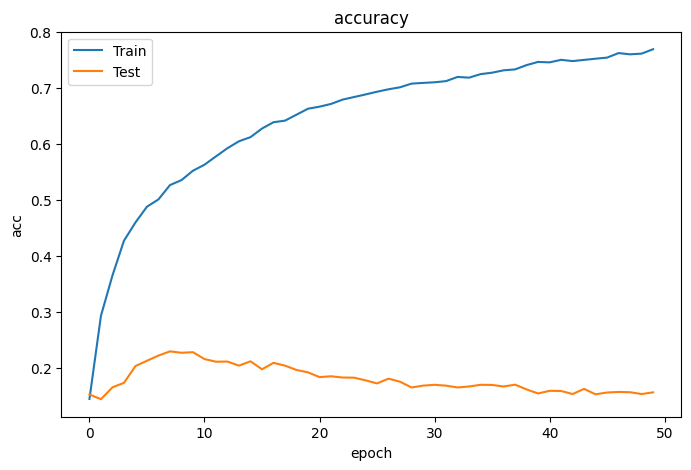

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("acc")
plt.title("accuracy")
plt.legend(['Train', 'Test'])
plt.show()

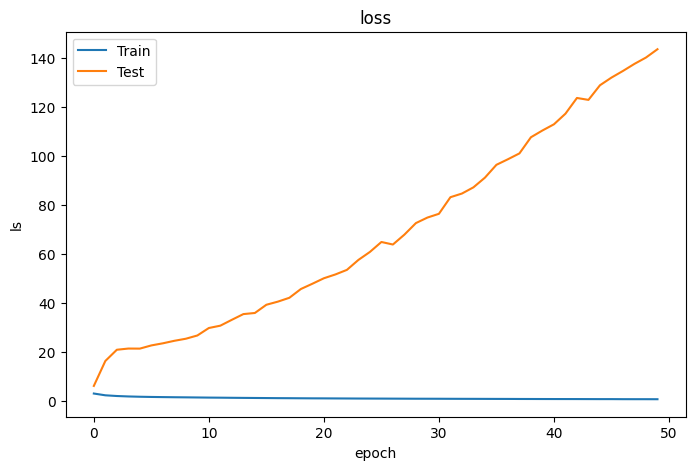

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("ls")
plt.title("loss")
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
sample_records = X_test[:1000]

In [ ]:
pred = model.predict(sample_records)

32/32 [==============================] - 0s 2ms/step


In [ ]:
pred_label = np.argmax(pred, axis=1)

In [ ]:
pred_label

array([ 4,  4, 13, 10, 21,  4, 23,  7, 17, 19,  2, 14, 23, 22,  4, 15,  1,
       17, 20, 18,  7, 16, 24,  0, 23, 18,  4,  4, 24,  6,  4,  9, 25, 23,
        6, 12, 25, 20, 11,  8, 10,  8, 25, 21, 10, 24, 20, 22,  1, 12, 25,
       12,  1, 11, 14,  5,  7, 21, 19,  9, 12, 14, 24, 17, 12,  0, 22, 20,
        1, 20, 25,  0,  7,  0,  4,  3, 16, 22, 22, 20,  0, 13, 19,  2, 16,
        0, 12, 23, 24,  4, 17, 17,  5,  6, 24, 10, 13, 25, 18, 14, 19, 20,
       10,  5, 21, 23, 19, 20, 21, 19, 19,  4,  2, 21, 18, 10, 12, 21,  6,
       23,  3,  4, 16,  8, 13,  2, 25, 22, 12, 21, 25,  9, 19,  5, 13, 21,
       20, 24,  7, 18,  1, 23, 24,  2, 25, 15, 21, 13, 10, 11,  6, 17, 22,
       14, 25, 17,  4,  0, 18, 15, 11, 13, 21, 15, 17,  1,  3, 12, 23, 17,
       17, 22,  4, 10,  9, 20,  6, 19, 23, 23,  0, 10, 11, 23, 21, 24, 11,
       25,  4,  6, 10,  4,  0, 18,  1,  4, 16, 18, 24,  3,  7,  0, 17, 24,
       23,  4,  0,  1, 14, 11, 20,  9, 14, 12,  7, 16, 25,  9, 19, 19, 19,
       17, 23, 23, 13,  3

In [ ]:
pred_lett = label_encoder.inverse_transform(pred_label)
actual_lett = label_encoder.inverse_transform(y_test[:1000])

In [ ]:
pred_lett

array(['E', 'E', 'N', 'K', 'V', 'E', 'X', 'H', 'R', 'T', 'C', 'O', 'X',
       'W', 'E', 'P', 'B', 'R', 'U', 'S', 'H', 'Q', 'Y', 'A', 'X', 'S',
       'E', 'E', 'Y', 'G', 'E', 'J', 'Z', 'X', 'G', 'M', 'Z', 'U', 'L',
       'I', 'K', 'I', 'Z', 'V', 'K', 'Y', 'U', 'W', 'B', 'M', 'Z', 'M',
       'B', 'L', 'O', 'F', 'H', 'V', 'T', 'J', 'M', 'O', 'Y', 'R', 'M',
       'A', 'W', 'U', 'B', 'U', 'Z', 'A', 'H', 'A', 'E', 'D', 'Q', 'W',
       'W', 'U', 'A', 'N', 'T', 'C', 'Q', 'A', 'M', 'X', 'Y', 'E', 'R',
       'R', 'F', 'G', 'Y', 'K', 'N', 'Z', 'S', 'O', 'T', 'U', 'K', 'F',
       'V', 'X', 'T', 'U', 'V', 'T', 'T', 'E', 'C', 'V', 'S', 'K', 'M',
       'V', 'G', 'X', 'D', 'E', 'Q', 'I', 'N', 'C', 'Z', 'W', 'M', 'V',
       'Z', 'J', 'T', 'F', 'N', 'V', 'U', 'Y', 'H', 'S', 'B', 'X', 'Y',
       'C', 'Z', 'P', 'V', 'N', 'K', 'L', 'G', 'R', 'W', 'O', 'Z', 'R',
       'E', 'A', 'S', 'P', 'L', 'N', 'V', 'P', 'R', 'B', 'D', 'M', 'X',
       'R', 'R', 'W', 'E', 'K', 'J', 'U', 'G', 'T', 'X', 'X', 'A

In [ ]:
accuracy = np.sum(pred_label == y[:1000]) / len(pred_label)

In [ ]:
accuracy

0.04

In [ ]:
# Print the predicted labels and corresponding actual labels
print("Predicted Labels\tActual Labels")
for i in range(len(pred_lett)):
    print(f"{pred_lett[i]}\t\t\t{actual_lett[i]}")

Predicted Labels	Actual Labels
E			T
E			L
N			A
K			E
V			Q
E			E
X			O
H			Q
R			G
T			O
C			B
O			P
X			V
W			Q
E			M
P			V
B			B
R			K
U			S
S			D
H			B
Q			P
Y			Q
A			O
X			W
S			Z
E			N
E			Q
Y			G
G			F
E			B
J			J
Z			R
X			I
G			X
M			Y
Z			U
U			I
L			D
I			X
K			L
I			M
Z			E
V			U
K			W
Y			F
U			H
W			X
B			A
M			W
Z			Q
M			M
B			T
L			G
O			R
F			E
H			X
V			O
T			D
J			J
M			O
O			U
Y			G
R			G
M			T
A			E
W			N
U			Q
B			I
U			R
Z			H
A			T
H			R
A			U
E			A
D			L
Q			W
W			Q
W			P
U			K
A			S
N			G
T			T
C			S
Q			O
A			G
M			O
X			U
Y			E
E			J
R			V
R			S
F			L
G			N
Y			G
K			O
N			S
Z			X
S			K
O			U
T			R
U			D
K			U
F			D
V			Y
X			T
T			S
U			P
V			B
T			A
T			P
E			X
C			G
V			Z
S			I
K			B
M			S
V			U
G			X
X			T
D			H
E			G
Q			V
I			M
N			X
C			S
Z			T
W			S
M			W
V			T
Z			B
J			D
T			C
F			F
N			P
V			Q
U			E
Y			H
H			U
S			A
B			N
X			J
Y			T
C			K
Z			S
P			S
V			G
N			O
K			N
L			Y
G			L
R			C
W			J
O			X
Z			W
R			F
E			T
A			I
S			A
P			L
L			T
N		